In [1]:
install.packages("tidyverse")
install.packages("Seurat")
install.packages('useful')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(Seurat)
library(tidyverse)
library(useful)
library(ggplot2)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
#read cell by gene table
cell_gene_table <- read.csv("./HumanBreastCancerPatient1_cell_by_gene.csv", stringsAsFactors = F, header = T)
# Remove column 1
cell_gene_table <- cell_gene_table[, -1]

#remve "Blanks"
cell_gene_table <- cell_gene_table %>% select(-contains("Blank."))
cell_gene_table <- t(cell_gene_table)
corner(cell_gene_table)
dim(cell_gene_table)

#read metadata
cell_meta <- read.csv("./HumanBreastCancerPatient1_cell_metadata.csv", header = T)
cell_names <- cell_meta[,1]
cell_meta <- cell_meta[,-1]
corner(cell_meta)
dim(cell_meta)

#adding cell names
colnames(cell_gene_table) <- cell_names
corner(cell_gene_table)

PDK4,2,0,1,0,0
CCL26,0,0,0,0,0
CX3CL1,5,0,2,4,0
PGLYRP1,0,0,0,0,0
CD4,0,0,0,0,0


[1]    500 713121

,fov,volume,center_x,center_y,min_x
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,547.8415,10996.35,-211.3152,10991.19
2,0,291.1015,11103.18,-209.9355,11099.33
3,0,489.9781,11007.30,-209.5927,11003.00
4,0,654.0377,11106.93,-207.3661,11100.50
5,0,861.3299,11061.54,-205.6071,11055.88


[1] 713121      8

,128421,128422,128425,128426,128427
PDK4,2,0,1,0,0
CCL26,0,0,0,0,0
CX3CL1,5,0,2,4,0
PGLYRP1,0,0,0,0,0
CD4,0,0,0,0,0


In [4]:
#create seurat object
viz_seurat <- CreateSeuratObject(counts = cell_gene_table, meta.data = cell_meta)
View(viz_seurat@meta.data)

Warning message in CreateSeuratObject.default(counts = cell_gene_table, meta.data = cell_meta):
“Some cells in meta.data not present in provided counts matrix”


,orig.ident,nCount_RNA,nFeature_RNA,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y
,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128421,SeuratProject,2037,278,486,541.2526,4095.964,2023.526,4091.316,4100.612,2018.207,2028.845
128422,SeuratProject,294,115,486,600.3396,4105.396,2023.747,4099.713,4111.078,2019.525,2027.968
128425,SeuratProject,735,188,486,1066.5442,4103.778,2033.965,4097.610,4109.946,2027.224,2040.707
128426,SeuratProject,1517,233,486,1036.4537,3986.235,2038.150,3980.168,3992.302,2028.543,2047.757
128427,SeuratProject,856,192,486,719.2636,4093.906,2034.254,4088.835,4098.977,2028.917,2039.592
128428,SeuratProject,1846,247,486,1790.1069,4122.903,2040.056,4115.321,4130.486,2029.480,2050.632
128429,SeuratProject,311,126,486,1390.4414,3978.134,2040.252,3971.441,3984.828,2029.975,2050.528
128431,SeuratProject,1723,264,486,558.9510,4085.844,2036.935,4081.502,4090.187,2031.551,2042.318
128433,SeuratProject,1655,263,486,832.4256,3969.190,2040.508,3963.939,3974.441,2034.181,2046.836


In [5]:
viz_seurat

An object of class Seurat 
500 features across 713121 samples within 1 assay 
Active assay: RNA (500 features, 0 variable features)

In [6]:
#filter cells by nCount and volume
viz_seurat <- subset(viz_seurat, subset = nCount_RNA > 20 & volume < 2500 & volume > 20)
viz_seurat

An object of class Seurat 
500 features across 660924 samples within 1 assay 
Active assay: RNA (500 features, 0 variable features)

##Downsize for testing param
viz_seurat_small <- subset(x = viz_seurat, downsample = 10000)

all.genes <- rownames(viz_seurat_small)
viz_seurat_small <- NormalizeData(object = viz_seurat_small, normalization.method = "CLR", margin = 2)
viz_seurat_small <- ScaleData(viz_seurat_small, features = all.genes)

viz_seurat_small <- SCTransform(viz_seurat_small, assay = "RNA", clip.range = c(-10, 10), )
viz_seurat_small <- RunPCA(viz_seurat_small, npcs = 30, features = rownames(vizgen.obj))
viz_seurat_small <- RunUMAP(viz_seurat_small, dims = 1:30)
viz_seurat_small <- FindNeighbors(viz_seurat_small, reduction = "pca", dims = 1:30)
viz_seurat_small <- FindClusters(viz_seurat_small, resolution = 0.3)

In [7]:
#https://satijalab.org/seurat/reference/sctransform
#viz_seurat<- SCTransform(viz_seurat, assay = "RNA", clip.range = c(-10, 10), )
# No need to "FindVariableFeatures" in Vizgen. Use all features for PCA so don't do SCTransform

all.genes <- rownames(viz_seurat)
viz_seurat <- NormalizeData(object = viz_seurat, normalization.method = "CLR", margin = 2)
viz_seurat <- ScaleData(viz_seurat, features = all.genes)

viz_seurat<- RunPCA(viz_seurat, npcs = 30, features = rownames(viz_seurat))
viz_seurat<- RunUMAP(viz_seurat, dims = 1:30)
viz_seurat<- FindNeighbors(viz_seurat, reduction = "pca", dims = 1:30)
viz_seurat<- FindClusters(viz_seurat, resolution = 0.3)

Normalizing across cells

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”
Centering and scaling data matrix

PC_ 1 
Positive:  COL1A1, C1QC, TGFB1, TGFBI, SFRP2, COL11A1, PDGFRB, CD14, FCGR3A, TGFBR2 
	   CYBB, SERPINE1, FN1, NRP1, CSF1R, ZEB1, MRC1, ACTA2, PECAM1, ITGB2 
	   DUSP1, FOS, PTPRC, LYZ, SPP1, MMP9, CD248, CD4, COL6A3, CCR1 
Negative:  TAPBP, PTK2, MSH6, MYC, LRP6, FZD7, VCAM1, CDH1, CD40, TAP2 
	   NFE2L2, NFKB2, BRD4, CREBBP, EPCAM, CDKN1B, ERBB2, MSH2, AKT3, HDAC1 
	   TP53, EPHB3, EPHB4, STAT6, LAMB3, PKM, MCM2, CDK4, KRAS, DIABLO 
PC_ 2 
Positive:  MYC, EPCAM, CDH1, CR2, VCAM1, MCM2, DKK1, FZD7, MSH6, FOXM1 
	   ERBB3, EPHB3, SMO, LAMB3, LRP6, BIRC5, FGFR2, ERBB2, CDKN1B, CDCA7 
	   MSH2, SOX9, PTK2, MYBL2, SRPRB, TP53, TAPBP, EPHB4, PLK1, AKT3 
Negative:  NRP1, TGFBI, TGFBR2, BST2, ITGB2, TGFB1, FCGR3A, CYBB, CD14, C1QC 
	   FN1, DUSP1, CSF1R, PECAM1, LRP1, FCGR2A, COL1A1, CD4, HAVCR2, CCR1 
	   PTPRC, LYZ, TLR2, ENG, S

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 660924
Number of edges: 12659726

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9250
Number of communities: 127
Elapsed time: 616 seconds


115 singletons identified. 12 final clusters.



DimPlot(viz_seurat_small, reduction = "umap")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



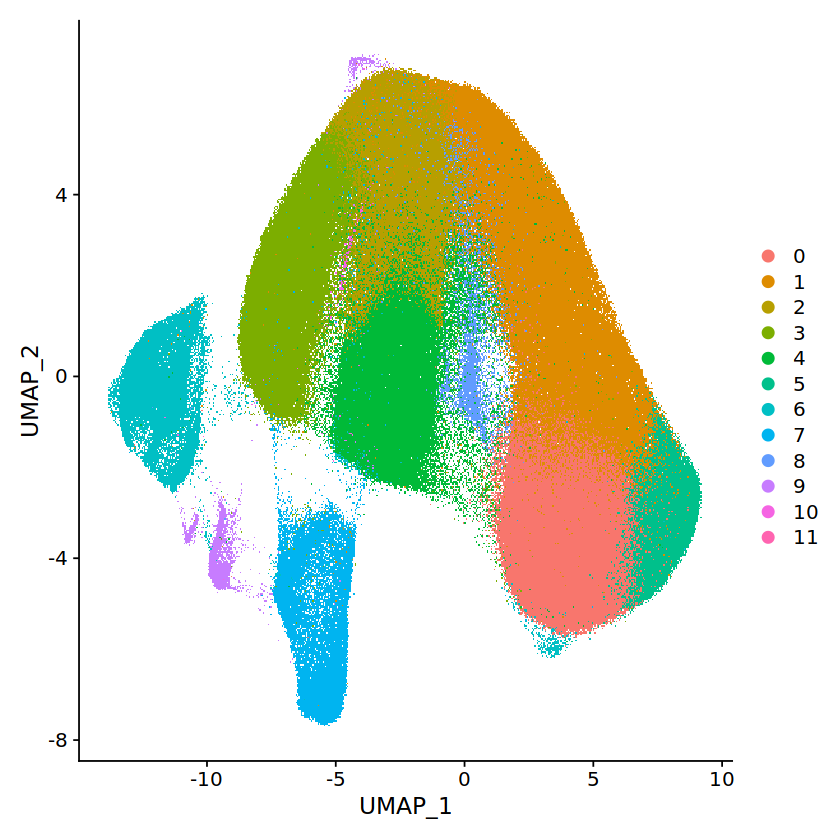

In [8]:
DimPlot(viz_seurat, reduction = "umap")

In [9]:
viz_seurat@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y,RNA_snn_res.0.3,seurat_clusters
,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
128421,SeuratProject,2037,278,486,541.2526,4095.964,2023.526,4091.316,4100.612,2018.207,2028.845,0,0
128422,SeuratProject,294,115,486,600.3396,4105.396,2023.747,4099.713,4111.078,2019.525,2027.968,1,1
128425,SeuratProject,735,188,486,1066.5442,4103.778,2033.965,4097.610,4109.946,2027.224,2040.707,5,5
128426,SeuratProject,1517,233,486,1036.4537,3986.235,2038.150,3980.168,3992.302,2028.543,2047.757,0,0
128427,SeuratProject,856,192,486,719.2636,4093.906,2034.254,4088.835,4098.977,2028.917,2039.592,0,0
128428,SeuratProject,1846,247,486,1790.1069,4122.903,2040.056,4115.321,4130.486,2029.480,2050.632,0,0
128429,SeuratProject,311,126,486,1390.4414,3978.134,2040.252,3971.441,3984.828,2029.975,2050.528,1,1
128431,SeuratProject,1723,264,486,558.9510,4085.844,2036.935,4081.502,4090.187,2031.551,2042.318,0,0
128433,SeuratProject,1655,263,486,832.4256,3969.190,2040.508,3963.939,3974.441,2034.181,2046.836,0,0


ImageDimPlot(viz_seurat, cols = "polychrome", axes = TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




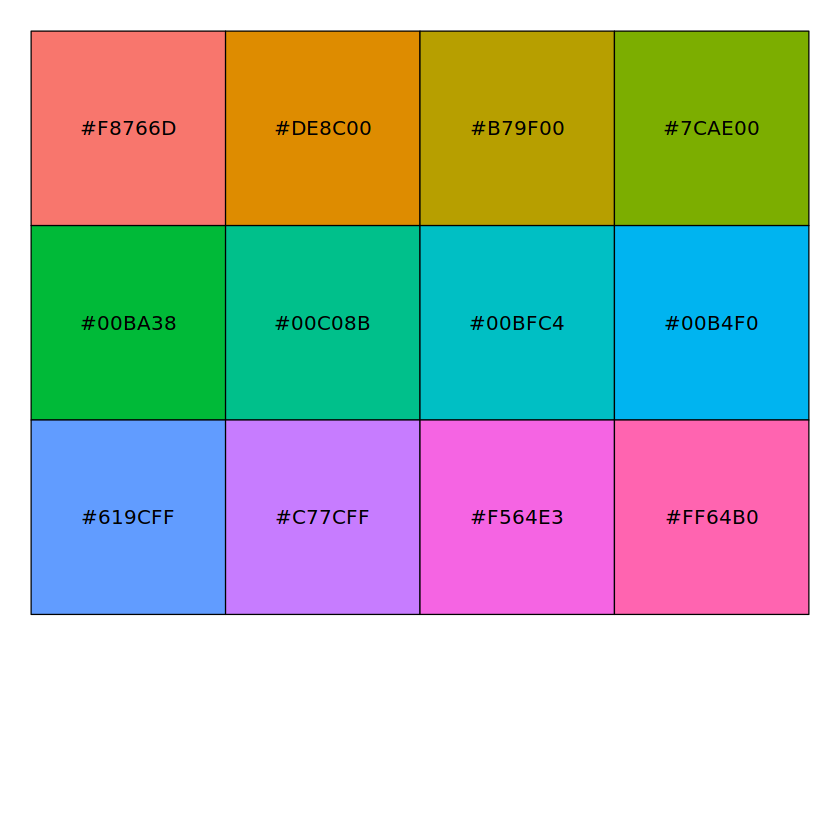

In [11]:
#retrieve UMAP color palette
#https://github.com/satijalab/seurat/issues/2366
n_clusters <- length(unique(viz_seurat@meta.data$seurat_clusters))

install.packages("scales")
library(scales)
show_col(hue_pal()(n_clusters))

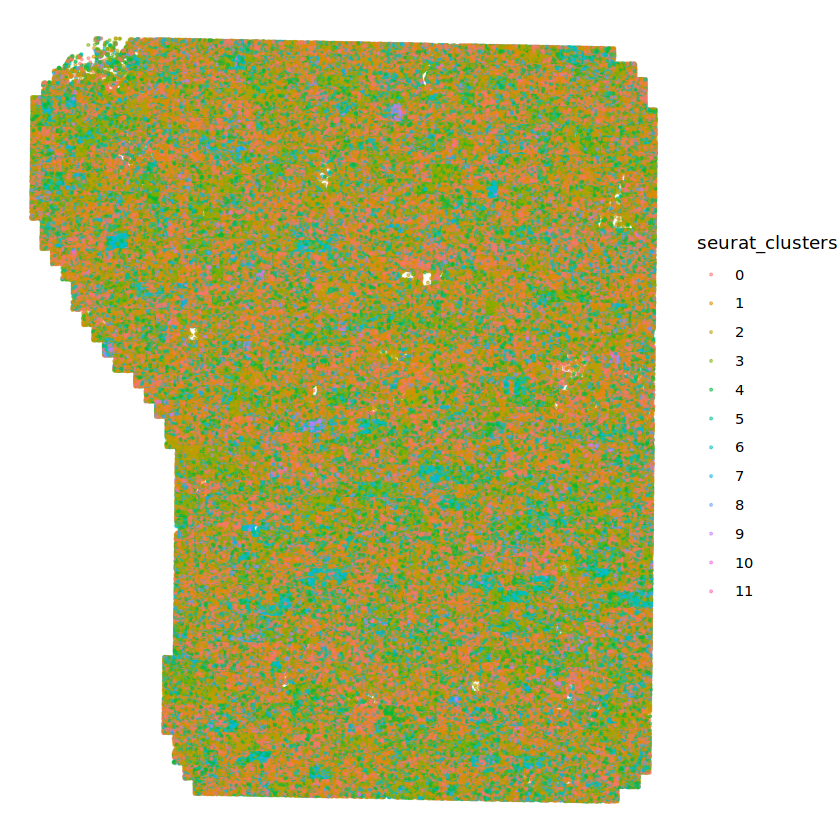

In [12]:
#Use ggplot2 to create spatial projections of all clusters
#create dataframe for plotting
df <- viz_seurat@meta.data
 
# Use scatterplot to project the clusters
ggplot(df, aes(x=center_x, y=center_y, color=seurat_clusters)) + 
    geom_point(size=.5, alpha = 0.5) +
    theme(
        panel.background = element_rect(fill = "black",
                                colour = "black", linetype = "solid"),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()
    ) +
    theme_void()


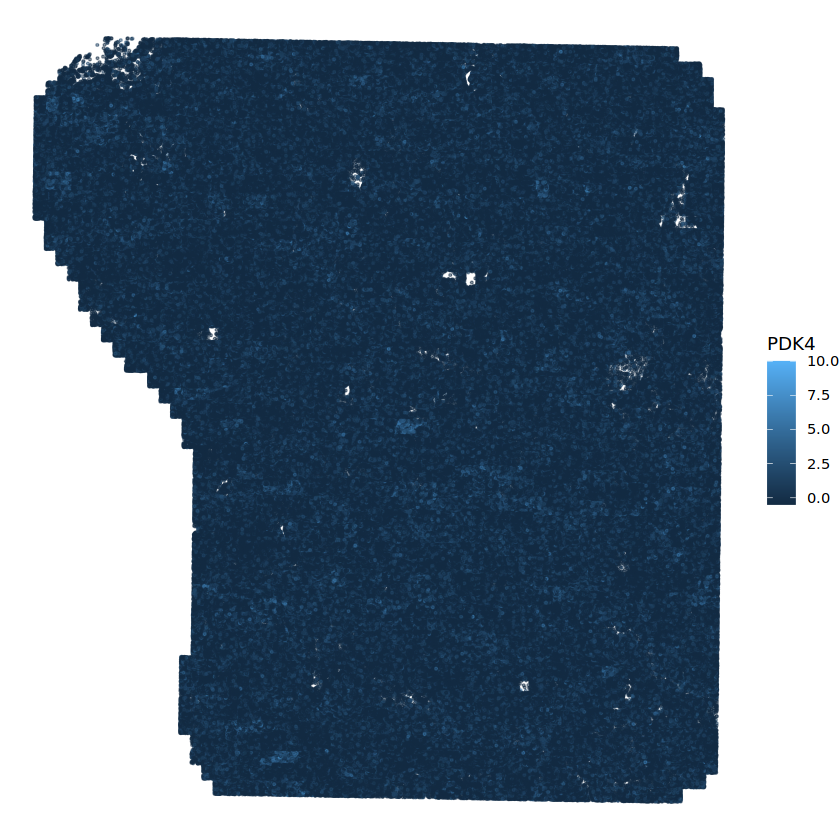

In [84]:
#Use ggplot2 to create spatial projections of genes
#create dataframe for plotting
gene <- "PDK4"

meta_df <- viz_seurat@meta.data %>% select(center_x, center_y)
scaled_count <- viz_seurat@assays$RNA@scale.data[gene,]
meta_df[gene] <- scaled_count
#meta_df <- head(meta_df, 1000)

meta_df %>% ggplot(aes(center_x, center_y)) +
    geom_point(aes(colour = PDK4), , size=.5, alpha = 0.5) +
    theme_void()

SaveH5Seurat(viz_seurat, overwrite = TRUE)
viz_seurat <- LoadData(ds = "viz_seurat")